# Assignment 24 Solutions

#### 1. Implement a class iterator to flatten a nested list of lists of integers. Each list element is either an integer or a list. There can be many levels of nested lists in lists.

The class initializes with a nested list. It also has two methods:

  1. next() returns an integer in the order of appearance.
  2. hasNext() returns True / False regarding if all integers have been retrieved or not.

Write the Class implementation for three required methods.

**Examples:**   

`ni, actual = NestedIterator([[1, 1], 2, [1, 1]]), []
while ni.hasNext():
    actual.append(ni.next())
actual ➞ [1, 1, 2, 1, 1]`

`ni, actual = NestedIterator([1, [4, [6]]]), []
while ni.hasNext():
    actual.append(ni.next())
actual ➞ [1, 4, 6]`

`ni, actual = NestedIterator([[[]], []]), []
while ni.hasNext():
    actual.append(ni.next())
actual ➞ []`

In [205]:
# class NestedIterator:
#     def __init__(self,in_list):
#         self.in_list = in_list
#     def hasNext(self):
#         return True if len(self.in_list) > 0 else False
#     def next(self):
#         for ele in self.in_list:
#             print('Iterated Item',ele)
#             if isinstance(ele,int):
#                 return self.in_list.pop(self.in_list.index(ele))
#             else:
#                 not_int = self.in_list.pop(self.in_list.index(ele))
#                 for item in range(len(not_int)-1,-1,-1):
#                     self.in_list.insert(0,not_int[item])
            
                    
# ni = NestedIterator([[4, 5], 2, [1, 2]])
# ni.next()
# ni.in_list

#### 2. Implement the class Shape that receives perimeter and density function into __init__ method. The list of consecutive corners defines shape of a 2-dimensional object. The density function defines the mass distribution inside the shape. To compute mass in a certain point m(x, y) = small_square * density(x, y). The __init__ method calls other internal methods that compute three characteristics of the shape:

   - area
   - total mass
   - center of mass (xc, yc)

The computational grid has distance between two neighboring points as 2 * delta, the distance between a grid point and the perimeter wall is delta.  

**Examples:**   
`sh_ex1 = Shape([(1, 1), (3, 1), (3, 2), (1, 2)], lambda x, y: 100 + 100 * x)`  
`sh_ex1.area ➞ 2.0`  
`sh_ex1.mass ➞ 600.0`  
`sh_ex1.mass_center ➞ (2.1, 1.5)`  

The example can be verified via analytical integration. Other shapes in Tests are slightly more complicated and require numerical integration as illustrated here:

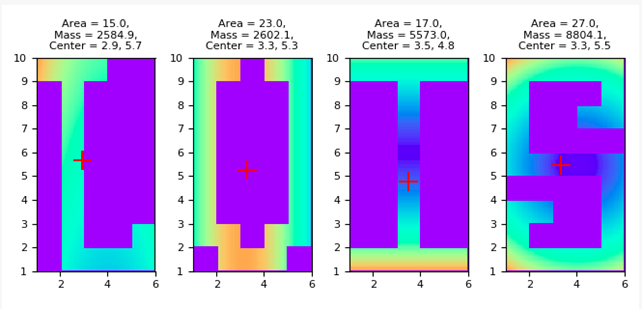


#### 3. Given a 3x3 matrix of a completed tic-tac-toe game, create a function that returns whether the game is a win for "X", "O", or a "Draw", where "X" and "O" represent themselves on the matrix, and "E" represents an empty spot.
**Examples:**   
`tic_tac_toe([
  ["X", "O", "X"],
  ["O", "X",  "O"],
  ["O", "X",  "X"]
]) ➞ "X"`  

`tic_tac_toe([
  ["O", "O", "O"],
  ["O", "X", "X"],
  ["E", "X", "X"]
]) ➞ "O"`  

`tic_tac_toe([
  ["X", "X", "O"],
  ["O", "O", "X"],
  ["X", "X", "O"]
]) ➞ "Draw"`  

In [160]:
def tic_tac_toe(in_list):
    output = None  
    # Case 1 to search for horizontal match
    for ele in in_list:
        if len(list(set(ele))) == 1:
            output = list(set(ele))[0]
            break
    # Case 2 to search for vertical match   
    if output == None:
        for i in range(len(in_list)):
            temp = []
            for j in range(len(in_list)): temp.append(in_list[j][i])
            if len(list(set(temp))) == 1: output = list(set(temp))[0]
    # Case 3 to search for diagonal match
    if output == None:
        temp = []
        for ele in [0,1,2]:
            temp.append(in_list[ele][ele])
        if len(list(set(temp))) == 1: output = list(set(temp))[0]
    # Case 4 to search for reverse diagonal match
    if output == None:
        temp = []
        for i in [0,1,2]:
            for j in [0,1,2]:
                if sum([i,j]) == 2: temp.append(in_list[i][j])
        if len(list(set(temp))) == 1: output = list(set(temp))[0]
    # Case 5 Draw Condition
    if output == None: output = 'Draw'
    print(f'tic_tac_toe({in_list}) ➞ "{output}"')
            
tic_tac_toe([["X", "O", "X"],["O", "X", "O"],["O", "X", "X"]])
tic_tac_toe([["O", "O", "O"],["O","X", "X"],["E", "X", "X"]])
tic_tac_toe([["X", "X", "O"],["O", "O", "X"],["X", "X", "O"]])
tic_tac_toe([["X", "X", "O"],["X", "O", "X"],["X", "O", "O"]])
tic_tac_toe([["O", "O", "X"],["O", "X", "O"],["X", "O", "O"]])

tic_tac_toe([['X', 'O', 'X'], ['O', 'X', 'O'], ['O', 'X', 'X']]) ➞ "X"
tic_tac_toe([['O', 'O', 'O'], ['O', 'X', 'X'], ['E', 'X', 'X']]) ➞ "O"
tic_tac_toe([['X', 'X', 'O'], ['O', 'O', 'X'], ['X', 'X', 'O']]) ➞ "Draw"
tic_tac_toe([['X', 'X', 'O'], ['X', 'O', 'X'], ['X', 'O', 'O']]) ➞ "X"
tic_tac_toe([['O', 'O', 'X'], ['O', 'X', 'O'], ['X', 'O', 'O']]) ➞ "X"


#### 4. Your computer might have been infected by a virus! Create a function that finds the viruses in files and removes them from your computer.
**Examples:**   
`remove_virus("PC Files: spotifysetup.exe, virus.exe, dog.jpg") ➞ "PC Files: spotifysetup.exe, dog.jpg"`  
`remove_virus("PC Files: antivirus.exe, cat.pdf, lethalmalware.exe, dangerousvirus.exe ") ➞ "PC Files: antivirus.exe, cat.pdf"` 
`remove_virus("PC Files: notvirus.exe, funnycat.gif") ➞ "PC Files: notvirus.exe, funnycat.gif")`  

In [53]:
import re
def remove_virus(in_string):
    in_list = [x.strip() for x in re.split(", ",in_string)]
    output = []
    for ele in in_list:
        if ele not in ['virus.exe','dangerousvirus.exe','lethalmalware.exe']:
            output.append(ele)
    print(f'remove_virus({in_string}) ➞ "{", ".join(output)}"')
    
remove_virus("PC Files: spotifysetup.exe, virus.exe, dog.jpg")
remove_virus("PC Files: antivirus.exe, cat.pdf, lethalmalware.exe, dangerousvirus.exe ")
remove_virus("PC Files: notvirus.exe, funnycat.gif")

remove_virus(PC Files: spotifysetup.exe, virus.exe, dog.jpg) ➞ "PC Files: spotifysetup.exe, dog.jpg"
remove_virus(PC Files: antivirus.exe, cat.pdf, lethalmalware.exe, dangerousvirus.exe ) ➞ "PC Files: antivirus.exe, cat.pdf"
remove_virus(PC Files: notvirus.exe, funnycat.gif) ➞ "PC Files: notvirus.exe, funnycat.gif"


#### 5. In a video game, a meteor will fall toward the main character's home planet. Given the meteor's trajectory as a string in the form y = mx + b and the character's position as a tuple of (x, y), return True if the meteor will hit the character and False if it will not.
**Examples:**   
`will_hit("y = 2x - 5", (0, 0)) ➞ False`  
`will_hit("y = -4x + 6", (1, 2)) ➞ True`   
`will_hit("y = 2x + 6", (3, 2)) ➞ False`  

In [111]:
def will_hit(in_eq,in_loc):
    in_eq_list = in_eq.split(" ")
    temp_list = []
    for ele in in_eq_list:
        if 'x' in ele or 'y'in ele:
            if len(ele) == 1:
                temp_list.append(ele.replace('x',str(in_loc[0]))) if 'x' in ele else temp_list.append(ele.replace('y',str(in_loc[1])))
            else:
                temp_list.append(ele.replace('x',f'*{in_loc[0]}')) if 'x' in ele else temp_list.append(ele.replace('y',f'*{in_loc[1]}'))
        else:
            temp_list.append("==") if ele == "=" else temp_list.append(ele)
    print(f'will_hit{in_eq,in_loc} ➞ {eval(" ".join(temp_list))}')

will_hit("y = 2x - 5", (0, 0))
will_hit("y = -4x + 6", (1, 2))
will_hit("y = 2x + 6", (3, 2))

will_hit('y = 2x - 5', (0, 0)) ➞ False
will_hit('y = -4x + 6', (1, 2)) ➞ True
will_hit('y = 2x + 6', (3, 2)) ➞ False
